**Master Simulation**

Simulation of node states with pre processed distributions for group selection and uptime failures

In [1]:
import random
import simpy
import datetime
import numpy as np
import pandas as pd
import simulation_components as sc
import matplotlib.pyplot as plt

**Initialize Variables**

In [2]:
group_size = 100 # Group size
runs = 100 # number of runs/cycles
total_tickets = 50000 # total virtual stakers
nodes = 1000 # number of nodes
tickets = [] # initializing the array that will contain the tickets
group_members = [] # initializing the array that will contain indexes(node #) of tickets for each group
sim_cycles = 5 # maximum node cycles
node_failure_threshold = -0.2 * nodes # threshold below which a group is no longer viable
active_group_threshold = 50 # min number of active groups to pick from
node_failure_percent = [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35] # % of nodes failing randomly

In [ ]:
Group formation failure with virtual stakers 
- threshold at which a group does not form
- this threshold is always greater than the signing threshold

signing failure with vs
- there is a threshold at which a signature is not viable

**Simulation Inputs**

Text(0.5, 1.0, 'Virtual Staker Cumulative Distribution')

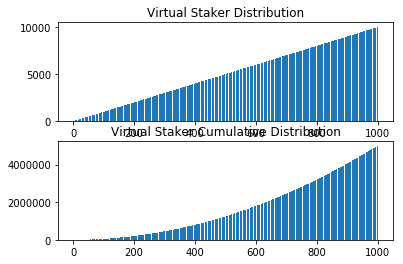

In [3]:
# Pre-processing Staker distributions
# Linear y = m * (x + 1) since indices start from 0
L02 = np.zeros(nodes) 

for i in range (0,nodes):
    L02[i] =  10 * (i + 1) # m = 50 gives max y as 1000 which is 2% of 50000

x = np.linspace(1,nodes,nodes)
plt.subplot(2, 1, 1)
plt.bar(x, L02)
plt.title("Virtual Staker Distribution")

cdf_L02=sc.create_cdf(nodes,L02)
plt.subplot(2, 1, 2)
plt.bar(x, cdf_L02)
plt.title("Virtual Staker Cumulative Distribution")

**Pre-processed tickets and groups**

In [4]:
tickets = sc.preprocess_tickets(runs, total_tickets) # generates a size(total tickets x runs) matrix of tickets by sampling the uniform distribution
group_members = sc.preprocess_groups(tickets, runs, group_size) # generates a size (nodes x runs) matrix of group members


In [5]:
def group_distr(runs, nodes, group_members, cdf):
# function to calculate group ownership distribution
# need to add to sim components
    total_group_distr = np.zeros(nodes)
    max_owned = np.zeros(runs)
    group_distr_matrix = np.zeros((runs,nodes))
    for i in range(runs):
        group_distr = np.zeros(nodes)
        group_distr[1] = sum(group_members[i]<cdf[0])
        for j in range(1,nodes):
            group_distr[j] = sum(group_members[i]<cdf[j])-sum(group_members[i]<cdf[j-1])
        max_owned[i] = max(group_distr)/sum(group_distr)
        total_group_distr +=group_distr
        group_distr_matrix[i] = group_distr #saves the group ticket distribution for each run
    return total_group_distr, max_owned, group_distr_matrix

total_group_distr, max_owned, group_distr_matrix = group_distr(runs, nodes, group_members, cdf_L02)

**Create Nodes and Start Simulation Environment**

In [6]:
env = simpy.Environment()
print("creating nodes")

node_array = [sc.Node(env, i, datetime.datetime.now(), tickets)
            for i in range(nodes)]

print("creating groups")
group_array = [sc.Group(env, i, nodes, group_distr_matrix, node_failure_threshold)
            for i in range(runs)]

failed_nodes = sc.node_failures(nodes, runs, node_failure_percent[0])
sign_successes = []
proc = env.process(sc.relay_entry(env, runs, group_array, node_array, sign_successes, nodes, node_failure_percent))

env.run(until=proc)

df = []
for n in node_array:
    df.append([n.id, n.number_of_entries_generated
               , n.relay_request_time
               , n.relay_entry_watch_time
               , sum(n.groups_joined)])
    
#df = pd.DataFrame(df)
#df.columns=["id", "number_of_entries_generated", "relay_request_time", "relay_entry_watch_time", "Total groups joined"]
#df

creating nodes
creating groups
failure_percent = 0.005
-6.0
group is active
-4.0
group is active
-4.0
group is active
-1.0
group is active
-4.0
group is active
-6.0
group is active
-4.0
group is active
-6.0
group is active
-3.0
group is active
-3.0
group is active
-4.0
group is active
-4.0
group is active
-3.0
group is active
-3.0
group is active
-5.0
group is active
-6.0
group is active
-6.0
group is active
-6.0
group is active
-2.0
group is active
-5.0
group is active
-4.0
group is active
-9.0
group is active
-5.0
group is active
-3.0
group is active
-5.0
group is active
-8.0
group is active
-4.0
group is active
-2.0
group is active
-4.0
group is active
-5.0
group is active
-1.0
group is active
-3.0
group is active
-3.0
group is active
-3.0
group is active
-7.0
group is active
-2.0
group is active
-4.0
group is active
-6.0
group is active
-2.0
group is active
-2.0
group is active
-8.0
group is active
-8.0
group is active
-3.0
group is active
-6.0
group is active
-2.0
group is active


-101.0
group is active
-92.0
group is active
-103.0
group is active
-102.0
group is active
-116.0
group is active
-84.0
group is active
-107.0
group is active
-105.0
group is active
-108.0
group is active
-108.0
group is active
-104.0
group is active
-91.0
group is active
-106.0
group is active
[100, 100, 100, 100]
failure_percent = 0.15
-151.0
group is active
-134.0
group is active
-138.0
group is active
-156.0
group is active
-155.0
group is active
-142.0
group is active
-137.0
group is active
-155.0
group is active
-160.0
group is active
-158.0
group is active
-155.0
group is active
-154.0
group is active
-161.0
group is active
-155.0
group is active
-155.0
group is active
-126.0
group is active
-145.0
group is active
-155.0
group is active
-146.0
group is active
-126.0
group is active
-141.0
group is active
-147.0
group is active
-146.0
group is active
-159.0
group is active
-145.0
group is active
-178.0
group is active
-143.0
group is active
-152.0
group is active
-146.0
group is 

-299.0
group is inactive
-307.0
group is inactive
-289.0
group is inactive
-318.0
group is inactive
-310.0
group is inactive
-315.0
group is inactive
-320.0
group is inactive
-309.0
group is inactive
-291.0
group is inactive
-291.0
group is inactive
-304.0
group is inactive
-320.0
group is inactive
-301.0
group is inactive
-310.0
group is inactive
-286.0
group is inactive
-308.0
group is inactive
-298.0
group is inactive
-301.0
group is inactive
-313.0
group is inactive
-316.0
group is inactive
-304.0
group is inactive
-274.0
group is inactive
-288.0
group is inactive
-301.0
group is inactive
-282.0
group is inactive
-317.0
group is inactive
-314.0
group is inactive
-320.0
group is inactive
-306.0
group is inactive
-305.0
group is inactive
-301.0
group is inactive
-308.0
group is inactive
-314.0
group is inactive
-278.0
group is inactive
-272.0
group is inactive
-302.0
group is inactive
-292.0
group is inactive
-292.0
group is inactive
-318.0
group is inactive
-308.0
group is inactive
